In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

file = tf.keras.utils
pd.set_option('display.max_columns',40)
pd.set_option('display.max_rows',20)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !importent; }</style>"))

In [3]:
df_data_org = pd.read_csv(r'C:\Users\Susara\Documents\ANN\H1.csv' )
df_data_org.tail(10)
df_data_org.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NULL,NULL,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303,NULL,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,82.0,0,1,Canceled,2015-05-06
9,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15,NULL,0,Transient,105.5,0,0,Canceled,2015-04-22


In [3]:
df_data_org.MarketSegment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups'], dtype=object)

In [4]:
df_data_org.DistributionChannel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined'], dtype=object)

In [5]:
df_data_org.AssignedRoomType.unique()

array(['C               ', 'A               ', 'D               ',
       'E               ', 'G               ', 'F               ',
       'I               ', 'B               ', 'H               ',
       'P               ', 'L               '], dtype=object)

In [6]:
df_data_org.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [4]:
pd.pivot_table(df_data_org,index=["MarketSegment"])

,ADR,Adults,ArrivalDateDayOfMonth,ArrivalDateWeekNumber,ArrivalDateYear,Babies,BookingChanges,Children,DaysInWaitingList,IsCanceled,IsRepeatedGuest,LeadTime,PreviousBookingsNotCanceled,PreviousCancellations,RequiredCarParkingSpaces,StaysInWeekNights,StaysInWeekendNights,TotalOfSpecialRequests
MarketSegment,,,,,,,,,,,,,,,,,,
Complementary,3.657413,1.587065,17.218905,29.059701,2016.159204,0.019900,0.487562,0.064677,0.019900,0.164179,0.089552,20.014925,0.169154,0.009950,0.213930,1.666667,0.482587,0.771144
Corporate,51.563183,1.249026,15.529233,26.112603,2016.074924,0.002165,0.336942,0.015591,0.082720,0.152014,0.242962,17.657861,1.423127,0.082287,0.135557,1.848852,0.488956,0.157644
Direct,111.670840,1.917703,16.024873,26.282358,2016.134807,0.026716,0.425150,0.169507,0.067557,0.134807,0.092891,48.457546,0.220789,0.015047,0.261938,2.572701,0.939659,0.584523
Groups,66.446964,1.801576,15.237491,26.148389,2016.062371,0.001714,0.420151,0.005997,3.211103,0.423920,0.011823,167.213331,0.011138,0.400446,0.047293,2.995716,1.065627,0.073167
Offline TA/TO,74.662571,1.914079,15.692586,28.258967,2015.979390,0.015926,0.191515,0.047243,0.236483,0.152302,0.021413,120.452489,0.033191,0.165685,0.067719,4.362420,1.779979,0.415953
Online TA,113.432480,1.934063,16.015004,27.423882,2016.201478,0.013819,0.226070,0.203847,0.000000,0.352417,0.020588,83.270968,0.044898,0.011845,0.151560,3.040104,1.173163,0.957020


In [4]:
pd.pivot_table(df_data_org,index=["MarketSegment","DistributionChannel","AssignedRoomType"]).head(10)

ADR    Adults  \
MarketSegment DistributionChannel AssignedRoomType                        
Complementary Corporate           A                  0.000000  1.500000   
                                  C                  0.000000  1.500000   
                                  D                  0.000000  1.250000   
                                  E                  0.500000  1.000000   
                                  F                  0.000000  2.000000   
                                  I                 16.800000  1.666667   
              Direct              A                  0.448000  1.640000   
                                  C                  2.269231  1.692308   
                                  D                  5.429348  1.652174   
                                  E                  0.869565  1.565217   

                                                    ArrivalDateDayOfMonth  \
MarketSegment DistributionChannel AssignedRoomType                          
Complementary Corporate           A                             20.750000   
                                  C                             14.000000   
                                  D                             18.000000   
                                  E                             19.250000   
                                  F                             12.000000   
                                  I                             13.000000   
              Direct              A                             18.240000   
                                  C                             13.000000   
                                  D                             15.413043   
                                  E                             22.521739   

                                                    ArrivalDateWeekNumber  \
MarketSegment DistributionChannel AssignedRoomType                          
Complementary Corporate           A                             38.500000   
                                  C                             33.500000   
                                  D                             34.000000   
                                  E                             37.250000   
                                  F                             38.000000   
                                  I                             30.333333   
              Direct              A                             26.960000   
                                  C                             29.384615   
                                  D                             31.717391   
                                  E                             34.913043   

                                                    ArrivalDateYear    Babies  \
MarketSegment DistributionChannel AssignedRoomType                              
Complementary Corporate           A                     2016.000000  0.000000   
                                  C                     2016.000000  0.000000   
                                  D                     2015.750000  0.000000   
                                  E                     2016.500000  0.000000   
                                  F                     2016.000000  0.000000   
                                  I                     2015.666667  0.000000   
              Direct              A                     2016.440000  0.000000   
                                  C                     2016.153846  0.000000   
                                  D                     2016.108696  0.043478   
                                  E                     2016.000000  0.000000   

                                                    BookingChanges  Children  \
MarketSegment DistributionChannel AssignedRoomType                             
Complementary Corporate           A                       0.250000  0.000000   
                                  C                       1.500000  0.000000   
              

In [6]:
pd.pivot_table(df_data_org,index=["ArrivalDateDayOfMonth","MarketSegment","AssignedRoomType"],values=["ADR"],aggfunc=np.sum).head(10)

ADR
ArrivalDateDayOfMonth MarketSegment AssignedRoomType         
1                     Complementary D                    0.00
                      Corporate     A                 1743.20
                                    B                  269.00
                                    C                  205.00
                                    D                 1653.00
                                    E                  268.50
                                    G                  107.42
                                    I                    0.00
                      Direct        A                 5154.76
                                    B                  308.00

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000282923F1BA8>],
      dtype=object)

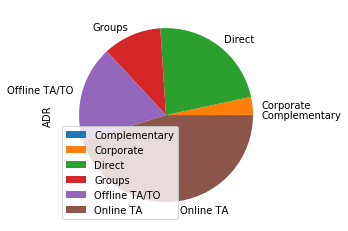

In [7]:
df_data_2016 = df_data_org[(df_data_org['ArrivalDateYear']==2016) & (df_data_org['IsCanceled']==0)]
df_data_2016.head()
pivot_df_data_2016 = pd.pivot_table(df_data_2016, index='MarketSegment',values='ADR', aggfunc=np.sum, fill_value=0)
pivot_df_data_2016.head()
df_data_2016 =pd.DataFrame(pivot_df_data_2016)
pivot_df_data_2016.plot.pie(subplots=True)


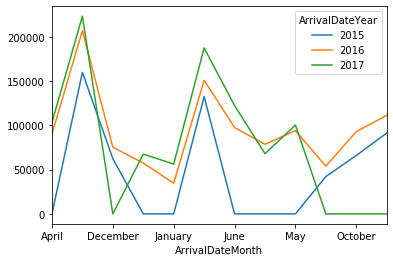

In [8]:
df_data_year = df_data_org[(df_data_org['IsCanceled']==0)]

pivot_data_year = pd.pivot_table(df_data_year, index='ArrivalDateMonth',columns=['ArrivalDateYear'], values='ADR', aggfunc=np.sum, fill_value=0)

pivot_data_year.plot()
#pd.pivot_table(df_data_year, index='ArrivalDateMonth',columns=['ArrivalDateYear'], values='ADR', aggfunc=np.sum, fill_value=0)



In [63]:
df_data_org. MarketSegment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups'], dtype=object)

In [64]:
df_data_org. CustomerType.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [65]:
df_data_org. Meal.unique()

array(['BB       ', 'FB       ', 'HB       ', 'SC       ', 'Undefined'],
      dtype=object)

In [66]:
df_data_org. ReservedRoomType.unique()

array(['C               ', 'A               ', 'D               ',
       'E               ', 'G               ', 'F               ',
       'H               ', 'L               ', 'P               ',
       'B               '], dtype=object)

In [67]:
df_data_org. Company.unique()

array(['       NULL', '110', '113', '270', '178', '240', '154', '144',
       '307', '268', '59', '204', '312', '318', '94', '174', '274', '195',
       '223', '317', '281', '118', '53', '286', '12', '47', '324', '342',
       '373', '371', '383', '86', '82', '218', '88', '31', '397', '392',
       '405', '331', '367', '20', '83', '416', '51', '395', '102', '34',
       '84', '360', '394', '457', '382', '461', '478', '386', '112',
       '486', '421', '9', '308', '135', '224', '504', '269', '356', '498',
       '390', '513', '203', '263', '477', '521', '169', '515', '445',
       '337', '251', '428', '292', '388', '130', '250', '355', '254',
       '543', '531', '528', '62', '120', '42', '81', '116', '530', '103',
       '39', '16', '92', '61', '501', '165', '291', '290', '43', '325',
       '192', '108', '200', '465', '287', '297', '490', '482', '207',
       '282', '437', '225', '329', '272', '28', '77', '338', '72', '246',
       '319', '146', '159', '380', '323', '511', '407', '278

In [68]:
df_data_org. Agent.unique()

array(['       NULL', '304', '240', '303', '15', '241', '8', '250', '115',
       '5', '175', '134', '156', '243', '242', '3', '105', '40', '147',
       '306', '184', '96', '2', '127', '95', '146', '9', '177', '6',
       '143', '244', '149', '167', '300', '171', '305', '67', '196',
       '152', '142', '261', '104', '36', '26', '29', '258', '110', '71',
       '181', '88', '251', '275', '69', '248', '208', '256', '314', '126',
       '281', '273', '253', '185', '330', '334', '328', '326', '321',
       '324', '313', '38', '155', '68', '335', '308', '332', '94', '348',
       '310', '339', '375', '66', '327', '387', '298', '91', '245', '385',
       '257', '393', '168', '405', '249', '315', '75', '128', '307', '11',
       '436', '1', '201', '183', '223', '368', '336', '291', '464', '411',
       '481', '10', '154', '468', '410', '390', '440', '495', '492',
       '493', '434', '57', '531', '420', '483', '526', '472', '429', '16',
       '446', '34', '78', '139', '252', '270', '47', '

In [69]:
df_data_org. Country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI'],
      dtype=object)

In [5]:
df_data_org['MarketSegment'] = pd.Categorical(df_data_org['MarketSegment'])
df_data_org['MarketSegmentCode'] = df_data_org.MarketSegment.cat.codes
df_data_org.drop(columns=['MarketSegment'], inplace=True)

In [10]:
#df_data_org['MarketSegment'].replace('Direct', 0, inplace=True)
#df_data_org['MarketSegment'].replace('Corporate', 1, inplace=True)
#df_data_org['MarketSegment'].replace('Online TA', 2, inplace=True)
#df_data_org['MarketSegment'].replace('Offline TA/TO', 3, inplace=True)
#df_data_org['MarketSegment'].replace('Complementary', 4, inplace=True)
#df_data_org['MarketSegment'].replace('Groups', 5, inplace=True)
df_data_org

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,MarketSegmentCode
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,2
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,2
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,2
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,August,35,31,2,8,2,1,0,BB,GBR,TA/TO,0,0,0,A,A,1,No Deposit,143,NULL,0,Transient,89.75,0,0,Check-Out,2017-09-10,4
40056,0,169,2017,August,35,30,2,9,2,0,0,BB,IRL,Direct,0,0,0,E,E,0,No Deposit,250,NULL,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10,2
40057,0,204,2017,August,35,29,4,10,2,0,0,BB,IRL,Direct,0,0,0,E,E,0,No Deposit,250,NULL,0,Transient,153.57,0,3,Check-Out,2017-09-12,2
40058,0,211,2017,August,35,31,4,10,2,0,0,HB,GBR,TA/TO,0,0,0,D,D,0,No Deposit,40,NULL,0,Contract,112.80,0,1,Check-Out,2017-09-14,4


In [6]:

train, test = train_test_split(df_data_org, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')
#df_data_org['MarketSegment'] = pd.to_numeric(df_data_org['MarketSegment'])
df_data_org.head()



25638 train examples
6410 validation examples
8012 test examples


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,MarketSegmentCode
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,2
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,5


In [15]:
#train.head
#val.head
#test.head

In [7]:
def df_to_dataset(df_data_org, shuffle=True, batch_size=32):
  df_data_org = df_data_org.copy()
  df_data_org = df_data_org.dropna()
  labels = df_data_org.pop('MarketSegmentCode')
  ds = tf.data.Dataset.from_tensor_slices((dict(df_data_org), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(df_data_org))
  ds = ds.batch(batch_size)
  return ds

In [8]:
#spliting of the data set into tarin test and vali

train, test = train_test_split(df_data_org, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')
#dataframe['MarketSegment'] = pd.to_numeric(dataframe['MarketSegment'])
df_data_org.head()


25638 train examples
6410 validation examples
8012 test examples


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,MarketSegmentCode
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,2
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,5


In [9]:
batch_size = 64 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [10]:
#demostrate of dataset in training sample

for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of Country:', feature_batch['Country'])
  print('A batch of targets:', label_batch )


Every feature: ['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'Meal', 'Country', 'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType', 'BookingChanges', 'DepositType', 'Agent', 'Company', 'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate']
A batch of Country: tf.Tensor(
[b'PRT' b'PRT' b'MAR' b'GBR' b'GBR' b'PRT' b'AUS' b'PRT' b'PRT' b'USA'
 b'PRT' b'ESP' b'PRT' b'CN' b'PRT' b'PRT' b'FRA' b'GBR' b'ESP' b'PRT'
 b'PRT' b'GBR' b'PRT' b'PRT' b'PRT' b'PRT' b'PRT' b'BEL' b'GBR' b'PRT'
 b'FRA' b'PRT' b'PRT' b'PRT' b'PRT' b'PRT' b'SWE' b'PRT' b'PRT' b'PRT'
 b'GBR' b'ROU' b'PRT' b'GBR' b'BRA' b'GBR' b'ESP' b'PRT' b'PRT' b'PRT'
 b'DEU' b'PRT' b'SWE' b'NLD' b'PRT' b'DEU' b'GBR' b'E

In [11]:
example_batch = next(iter(train_ds))[0]


In [12]:
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())


In [13]:
ADR = feature_column.numeric_column("ADR")
demo(ADR)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[[295.  ]
 [100.  ]
 [109.8 ]
 [162.  ]
 [ 60.83]
 [ 44.  ]
 [ 66.  ]
 [ 48.  ]
 [ 89.  ]
 [ 42.  ]
 [110.  ]
 [123.  ]
 [ 48.  ]
 [132.6 ]
 [ 90.71]
 [ 68.  ]
 [ 47.  ]
 [150.  ]
 [ 84.12]
 [ 41.4 ]
 [ 90.  ]
 [ 64.  ]
 [104.72]
 [ 83.  ]
 [106.84]
 [222.5 ]
 [ 80.94]
 [ 62.57]
 [ 88.56]
 [143.43]
 [ 37.8 ]
 [ 59.4 ]
 [ 63.  ]
 [ 62.  ]
 [ 48.  ]
 [ 54.99]
 [ 74.  ]
 [ 89.  ]
 [ 43.  ]
 [ 68.43]
 [ 94.41]
 [ 85.  ]
 [ 56.42]
 [ 76.5 ]
 [ 65.  ]
 [ 37.8 ]
 [ 83.47]
 [206.78]
 [ 46.  ]
 [253.57]
 [ 61.2 

In [14]:
CT = feature_column.categorical_column_with_vocabulary_list(
      'CustomerType', ['Transient', 'Contract', 'Transient-Party','Groups'])

CT_one_hot = feature_column.indicator_column(CT)
demo(CT_one_hot)



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 

In [15]:
feature_columns = []

# numeric cols
for header in ['Adults','Children','Babies', 'ADR']:
  feature_columns.append(feature_column.numeric_column(header))

CustomerType = feature_column.categorical_column_with_vocabulary_list(
      'CustomerType', ['Transient', 'Contract', 'Transient-Party', 'Group'])
CustomerType_one_hot = feature_column.indicator_column(CustomerType)
feature_columns.append(CustomerType_one_hot)

Meal = feature_column.categorical_column_with_vocabulary_list(
      'Meal', ['BB', 'FB', 'HB', 'SC', 'Undefined'])
Meal_one_hot = feature_column.indicator_column(Meal)
feature_columns.append(Meal_one_hot)

ArrivalDateMonth = feature_column.categorical_column_with_vocabulary_list(
      'ArrivalDateMonth', ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ArrivalDateMonth_one_hot = feature_column.indicator_column(ArrivalDateMonth)
feature_columns.append(ArrivalDateMonth_one_hot)

ReservedRoomType = feature_column.categorical_column_with_vocabulary_list(
      'ReservedRoomType', ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'P', 'L'])
ReservedRoomType_one_hot = feature_column.indicator_column(ReservedRoomType)
feature_columns.append(ReservedRoomType_one_hot)

Country = feature_column.categorical_column_with_vocabulary_list(
      'Country', ['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI'])
Country_one_hot = feature_column.indicator_column(Country)
feature_columns.append(Country_one_hot)

# Agent = feature_column.categorical_column_with_vocabulary_list(
#       'Agent', [ '        304', '        240', '        303',
#        '         15', '        241', '          8', '        250',
#        '        115', '          5', '        175', '        134',
#        '        156', '        243', '        242', '          3',
#        '        105', '         40', '        147', '        306',
#        '        184', '         96', '          2', '        127',
#        '         95', '        146', '          9', '        177',
#        '          6', '        143', '        244', '        149',
#        '        167', '        300', '        171', '        305',
#        '         67', '        196', '        152', '        142',
#        '        261', '        104', '         36', '         26',
#        '         29', '        258', '        110', '         71',
#        '        181', '         88', '        251', '        275',
#        '         69', '        248', '        208', '        256',
#        '        314', '        126', '        281', '        273',
#        '        253', '        185', '        330', '        334',
#        '        328', '        326', '        321', '        324',
#        '        313', '         38', '        155', '         68',
#        '        335', '        308', '        332', '         94',
#        '        348', '        310', '        339', '        375',
#        '         66', '        327', '        387', '        298',
#        '         91', '        245', '        385', '        257',
#        '        393', '        168', '        405', '        249',
#        '        315', '         75', '        128', '        307',
#        '         11', '        436', '          1', '        201',
#        '        183', '        223', '        368', '        336',
#        '        291', '        464', '        411', '        481',
#        '         10', '        154', '        468', '        410',
#        '        390', '        440', '        495', '        492',
#        '        493', '        434', '         57', '        531',
#        '        420', '        483', '        526', '        472',
#        '        429', '         16', '        446', '         34',
#        '         78', '        139', '        252', '        270',
#        '         47', '        114', '        301', '        193',
#        '        182', '        135', '        350', '        195',
#        '        352', '        355', '        159', '        363',
#        '        384', '        360', '        331', '        367',
#        '         64', '        406', '        163', '        414',
#        '        333', '        427', '        431', '        430',
#        '        426', '        438', '        433', '        418',
#        '        441', '        282', '        432', '         72',
#        '        450', '        180', '        454', '        455',
#        '         59', '        451', '        254', '        358',
#        '        469', '        165', '        467', '        510',
#        '        337', '        476', '        502', '        527',
#        '        479', '        508', '        535', '        302',
#        '        497', '        187'])
# Agent_one_hot = feature_column.indicator_column(Agent)
# feature_columns.append(Agent_one_hot)


In [16]:
#input layer
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [17]:
batch_size = 128
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/100
198/198 [==============================] - 13s 65ms/step - loss: 1.7403 - accuracy: 0.4463 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
198/198 [==============================] - 6s 32ms/step - loss: 1.6543 - accuracy: 0.4486 - val_loss: 1.6228 - val_accuracy: 0.4408
Epoch 3/100
198/198 [==============================] - 7s 34ms/step - loss: 1.5909 - accuracy: 0.4486 - val_loss: 1.5710 - val_accuracy: 0.4408
Epoch 4/100
198/198 [==============================] - 7s 33ms/step

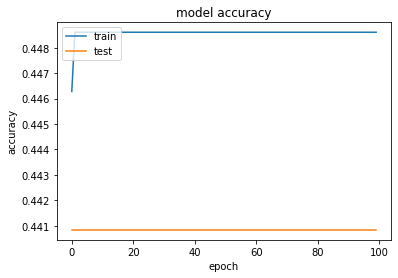

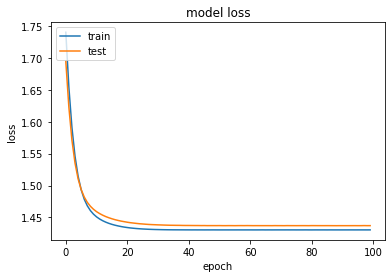

In [26]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu', kernel_initializer= keras.initializers.Zeros()),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=100)


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/100
198/198 [==============================] - 12s 59ms/step - loss: 1.4447 - accuracy: 0.4901 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
198/198 [==============================] - 6s 32ms/step - loss: 1.1001 - accuracy: 0.5673 - val_loss: 1.0356 - val_accuracy: 0.5920
Epoch 3/100
198/198 [==============================] - 6s 33ms/step - loss: 1.0588 - accuracy: 0.5814 - val_loss: 1.0253 - val_accuracy: 0.6008
Epoch 4/100
198/198 [==============================] - 7s 35ms/step

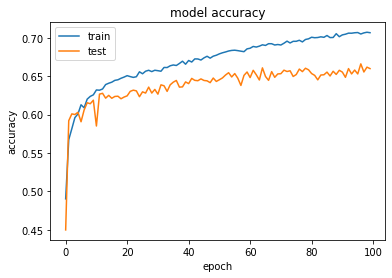

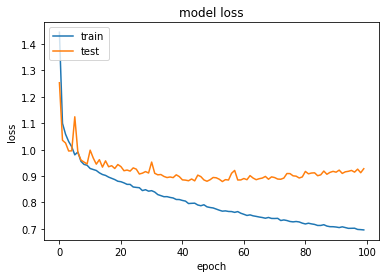

In [27]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu', bias_initializer='zeros'),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=100)


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/100
198/198 [==============================] - 11s 57ms/step - loss: 1.3779 - accuracy: 0.5013 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
198/198 [==============================] - 7s 34ms/step - loss: 1.0736 - accuracy: 0.5729 - val_loss: 1.0371 - val_accuracy: 0.5950
Epoch 3/100
198/198 [==============================] - 7s 34ms/step - loss: 1.0161 - accuracy: 0.5947 - val_loss: 1.0055 - val_accuracy: 0.5932
Epoch 4/100
198/198 [==============================] - 7s 36ms/step

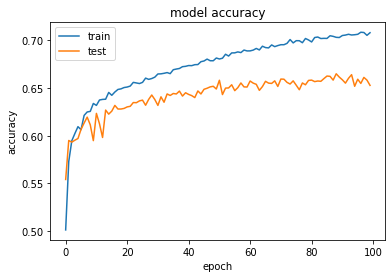

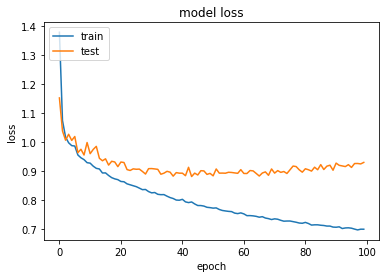

In [29]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu', kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None) ),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=100)


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/100
198/198 [==============================] - 12s 59ms/step - loss: 1.3113 - accuracy: 0.5143 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
198/198 [==============================] - 7s 34ms/step - loss: 1.0650 - accuracy: 0.5779 - val_loss: 1.0480 - val_accuracy: 0.5664
Epoch 3/100
198/198 [==============================] - 7s 36ms/step - loss: 1.0143 - accuracy: 0.5994 - val_loss: 0.9928 - val_accuracy: 0.6054
Epoch 4/100
198/198 [==============================] - 7s 34ms/step

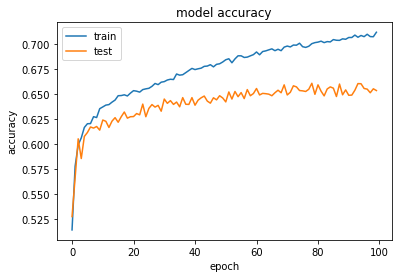

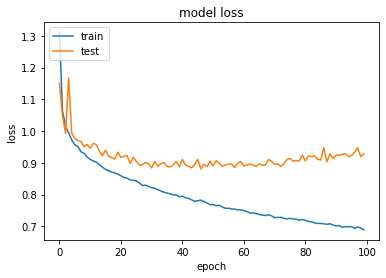

In [30]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu', kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None) ),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=100)


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/100
198/198 [==============================] - 11s 58ms/step - loss: 1.7334 - accuracy: 0.4669 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
198/198 [==============================] - 8s 38ms/step - loss: 1.1635 - accuracy: 0.5530 - val_loss: 1.1410 - val_accuracy: 0.5824
Epoch 3/100
198/198 [==============================] - 7s 36ms/step - loss: 1.0869 - accuracy: 0.5739 - val_loss: 1.1162 - val_accuracy: 0.5846
Epoch 4/100
198/198 [==============================] - 7s 37ms/step

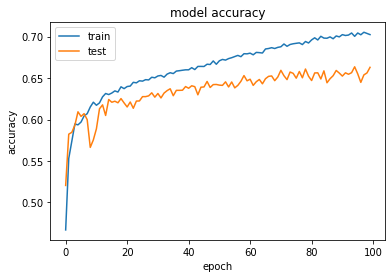

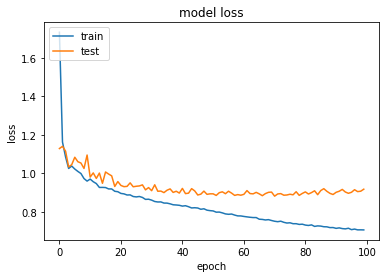

In [31]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None) ),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=100)


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/100
198/198 [==============================] - 13s 65ms/step - loss: 1.5458 - accuracy: 0.4507 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
198/198 [==============================] - 7s 38ms/step - loss: 1.1242 - accuracy: 0.5585 - val_loss: 1.0532 - val_accuracy: 0.5756
Epoch 3/100
198/198 [==============================] - 7s 37ms/step - loss: 1.0591 - accuracy: 0.5808 - val_loss: 1.0468 - val_accuracy: 0.5902
Epoch 4/100
198/198 [==============================] - 8s 38ms/step

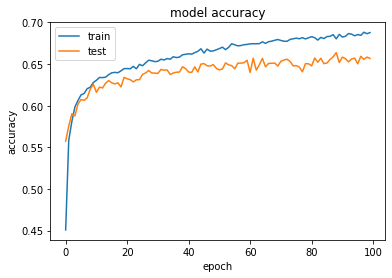

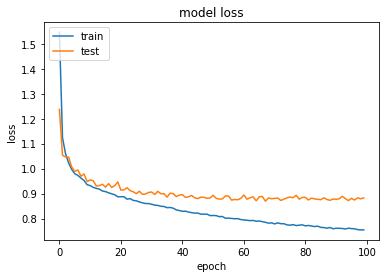

In [32]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=100)


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/100
198/198 [==============================] - 12s 62ms/step - loss: 1.8053 - accuracy: 0.4967 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
198/198 [==============================] - 7s 34ms/step - loss: 1.1803 - accuracy: 0.5548 - val_loss: 1.2343 - val_accuracy: 0.5710
Epoch 3/100
198/198 [==============================] - 7s 35ms/step - loss: 1.1398 - accuracy: 0.5704 - val_loss: 1.1109 - val_accuracy: 0.5846
Epoch 4/100
198/198 [==============================] - 7s 35ms/step

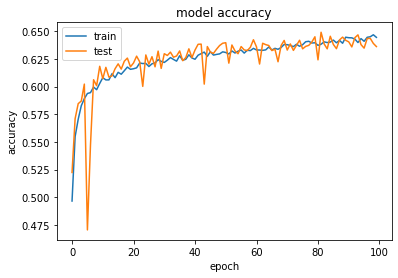

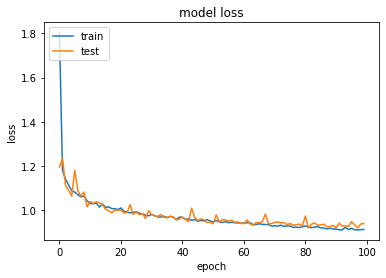

In [22]:
from tensorflow.keras.regularizers import l2 

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01) ),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=100)


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/100
198/198 [==============================] - 11s 56ms/step - loss: 6.8259 - accuracy: 0.4458 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
198/198 [==============================] - 9s 46ms/step - loss: 1.4410 - accuracy: 0.5040 - val_loss: 1.3543 - val_accuracy: 0.5212
Epoch 3/100
198/198 [==============================] - 9s 44ms/step - loss: 1.3579 - accuracy: 0.5323 - val_loss: 1.4560 - val_accuracy: 0.5311
Epoch 4/100
198/198 [==============================] - 8s 40ms/step

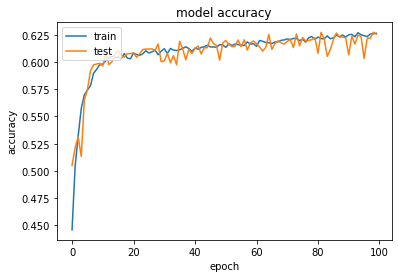

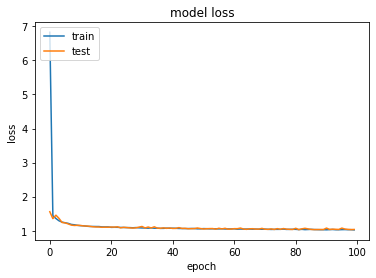

In [23]:
from tensorflow.keras.regularizers import l2 

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu', kernel_regularizer=l1(0.01) ),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=100)


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/100
198/198 [==============================] - 15s 77ms/step - loss: 1.1066 - accuracy: 0.5725 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
198/198 [==============================] - 8s 40ms/step - loss: 0.9875 - accuracy: 0.6040 - val_loss: 1.0758 - val_accuracy: 0.5620
Epoch 3/100
198/198 [==============================] - 8s 43ms/step - loss: 0.9620 - accuracy: 0.6133 - val_loss: 1.0692 - val_accuracy: 0.5991
Epoch 4/100
198/198 [==============================] - 7s 38ms/step

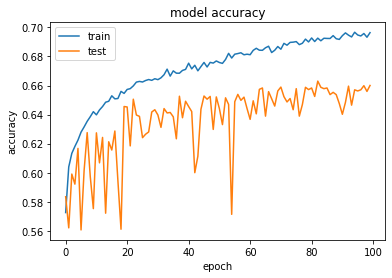

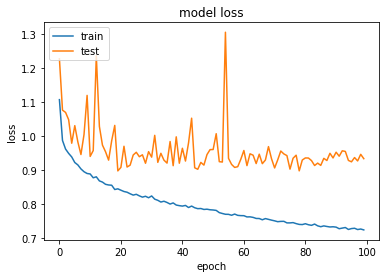

In [32]:
from keras.layers.normalization import BatchNormalization


model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu'),
  keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds,epochs=100)


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/100
198/198 [==============================] - 12s 60ms/step - loss: 1.3508 - accuracy: 0.5060 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
198/198 [==============================] - 6s 32ms/step - loss: 1.0867 - accuracy: 0.5728 - val_loss: 1.0587 - val_accuracy: 0.5882
Epoch 3/100
198/198 [==============================] - 7s 34ms/step - loss: 1.0434 - accuracy: 0.5888 - val_loss: 1.0543 - val_accuracy: 0.5552
Epoch 4/100
198/198 [==============================] - 6s 32ms/step

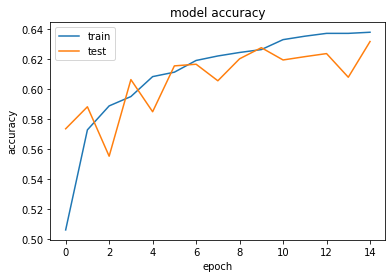

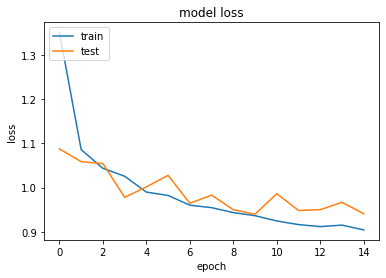

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l1 

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5)

history = model.fit(train_ds, validation_data=val_ds,epochs=100 , callbacks=[es])


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/100
198/198 [==============================] - 11s 57ms/step - loss: 1.4290 - accuracy: 0.4930 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
198/198 [==============================] - 7s 34ms/step - loss: 1.0984 - accuracy: 0.5712 - val_loss: 1.2284 - val_accuracy: 0.5640
Epoch 3/100
198/198 [==============================] - 6s 32ms/step - loss: 1.0522 - accuracy: 0.5860 - val_loss: 1.1401 - val_accuracy: 0.5702
Epoch 4/100
198/198 [==============================] - 6s 32ms/step

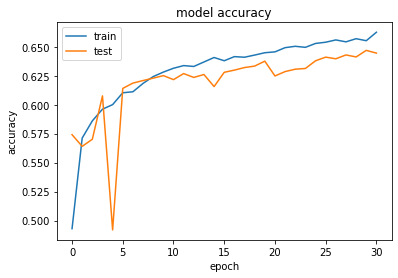

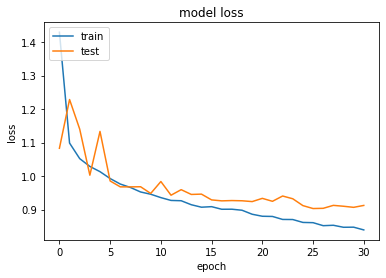

In [19]:

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5)

history = model.fit(train_ds, validation_data=val_ds,epochs=100 , callbacks=[es])


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()